In [2]:
# Import statements
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [66]:
piracy_df_original = pd.read_csv('Data_Files\[Clean] IMO Piracy - 2000 to 2022 (PDV 01-2023).csv')
# pd.concat([piracy_df_original.head(), piracy_df_original.tail()])
piracy_df_original.head(1)

,Incident Date,Ship Name,Ship Flag,Ship Type,Area,Latitude,Longitude,Consequences to Crew,Part of Ship Raided,Ship Status,Weapons Used,Flag - Crew Injuries,Flag - Crew Held Hostage,Flag - Crew Missing,Flag - Crew Deaths,Flag - Crew Assaulted
0,3/18/2010,AL-ASA'A,Yemen,Dhow,In international waters,NaN,NaN,Ship Hijacked,Not Stated,Not Stated,None or Not Reported,False,True,False,False,False


In [49]:
piracy_df_original['Part of Ship Raided'].value_counts()

Part of Ship Raided
Not Stated                       1060
Store Rooms                       768
Main Deck                         443
Engine Room                       247
Cargo Area                        198
Master and Crew Accomodations      94
Name: count, dtype: int64

In [50]:
piracy_df_original['Consequences to Crew'].value_counts()

Consequences to Crew
No Consequences or Not Stated      1173
Actual Violence Against Crew        514
Threat of Violence Against Crew     500
Not Reported                        389
Ship Hijacked                       230
Ship Missing                          4
Name: count, dtype: int64

In [51]:
piracy_df_original['Flag - Crew Injuries'].value_counts()

Flag - Crew Injuries
False    2710
True      100
Name: count, dtype: int64

In [52]:
piracy_df_original['Flag - Crew Held Hostage'].value_counts()

Flag - Crew Held Hostage
False    2472
True      338
Name: count, dtype: int64

In [53]:
piracy_df_original['Flag - Crew Missing'].value_counts()

Flag - Crew Missing
False    2795
True       15
Name: count, dtype: int64

In [54]:
piracy_df_original['Flag - Crew Deaths'].value_counts()

Flag - Crew Deaths
False    2788
True       22
Name: count, dtype: int64

In [55]:
piracy_df_original['Flag - Crew Assaulted'].value_counts()

Flag - Crew Assaulted
False    2741
True       69
Name: count, dtype: int64

In [10]:
piracy_df_original['Ship Type'].value_counts()

Ship Type
Bulk carrier                1156
Container ship               649
Tanker                       515
General cargo ship           466
Chemical tanker              437
                            ... 
Chemical Tanker                1
Fishing trawler                1
Ore/bulk/oil carrier           1
Cable-Layer                    1
Offshore tug/Supply ship       1
Name: count, Length: 63, dtype: int64

In [65]:
piracy_df_map = piracy_df_original.dropna(subset=['Latitude','Longitude']) #drop lat/long nulls for a map

In [45]:
severe_df = piracy_df_map[(piracy_df_map['Flag - Crew Deaths'] == True) | (piracy_df_map['Flag - Crew Missing'] == True)]



In [56]:
medium_df = piracy_df_map[(piracy_df_map['Flag - Crew Assaulted'] == True) | (piracy_df_map['Flag - Crew Injuries'] == True) | (piracy_df_map['Flag - Crew Held Hostage'] == True)]


In [67]:
low_df = piracy_df_map[(piracy_df_map['Flag - Crew Assaulted'] == False) & (piracy_df_map['Flag - Crew Injuries'] == False) & (piracy_df_map['Flag - Crew Held Hostage'] == False) & (piracy_df_map['Flag - Crew Deaths'] == False) & (piracy_df_map['Flag - Crew Missing'] == False)]

In [63]:
low_df

,Incident Date,Ship Name,Ship Flag,Ship Type,Area,Latitude,Longitude,Consequences to Crew,Part of Ship Raided,Ship Status,Weapons Used,Flag - Crew Injuries,Flag - Crew Held Hostage,Flag - Crew Missing,Flag - Crew Deaths,Flag - Crew Assaulted
6,4/21/2012,ALABASS,Yemen,Dhow,In international waters,15.333333,52.200000,Ship Hijacked,Not Stated,Steaming,None or Not Reported,False,False,False,False,False
10,4/26/2009,GNA,Yemen,Tanker,In international waters,13.425000,47.406667,Ship Hijacked,Not Stated,Steaming,None or Not Reported,False,False,False,False,False
11,12/4/2018,SAAVEDRA TIDE,Vanuatu,Supply ship,In international waters,3.133333,6.333333,Not Reported,Not Stated,Steaming,None or Not Reported,False,False,False,False,False
12,11/30/2020,Tango Rey,Vanuatu,General cargo ship,In port area,9.363333,-13.706667,No Consequences or Not Stated,Not Stated,At Anchor,Firearms,False,False,False,False,False
13,11/21/2022,Wayne / Rig T20,Vanuatu,Tug,In international waters,1.354333,103.293500,Not Reported,Not Stated,Steaming,None or Not Reported,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4807,4/23/2015,HUGLI SPIRIT,Bahamas,Chemical tanker,In territorial waters,1.280833,104.189667,No Consequences or Not Stated,Engine Room,Steaming,Knives,False,False,False,False,False
4808,4/26/2015,VOLME,Bahamas,Bulk carrier,In territorial waters,1.263500,104.171333,No Consequences or Not Stated,Engine Room,Steaming,None or Not Reported,False,False,False,False,False
4809,12/30/2009,GULF ELAN,Bahamas,Chemical tanker,In port area,22.690000,113.696667,No Consequences or Not Stated,Engine Room,At Anchor,None or Not Reported,False,False,False,False,False
4812,10/24/2009,ELLEN S,Antigua and Barbuda,Container ship,In territorial waters,20.641667,106.880000,Not Reported,Engine Room,At Anchor,None or Not Reported,False,False,False,False,False


In [70]:
import folium

# Create a map using Folium
map_center = [death_df['Latitude'].mean(), death_df['Longitude'].mean()]
m = folium.Map(location=map_center, zoom_start=4)

# Add markers for vessel type, ship status, and country
for index, row in severe_df.iterrows():
    popup_text = f"Vessel Type: {row['Ship Type']}<br>Ship Status: {row['Ship Status']}<br>Country: {row['Ship Flag']}"
    folium.CircleMarker(location=[row['Latitude'], row['Longitude']], radius=5, color='black', fill=True, fill_color='black', popup=popup_text).add_to(m)

for index, row in medium_df.iterrows():
    popup_text = f"Vessel Type: {row['Ship Type']}<br>Ship Status: {row['Ship Status']}<br>Country: {row['Ship Flag']}"
    folium.CircleMarker(location=[row['Latitude'], row['Longitude']], radius=5, color='red', fill=True, fill_color='red', popup=popup_text).add_to(m)

for index, row in low_df.iterrows():
    popup_text = f"Vessel Type: {row['Ship Type']}<br>Ship Status: {row['Ship Status']}<br>Country: {row['Ship Flag']}"
    folium.CircleMarker(location=[row['Latitude'], row['Longitude']], radius=5, color='yellow', fill=True, fill_color='yellow', popup=popup_text).add_to(m)

#legend
legend_html = '''
     <div style="position: fixed; bottom: 50px; left: 50px; width: 200px; height: 120px; background-color: white; border:2px solid grey; z-index:9999; font-size:14px;">
     <p><strong>Legend</strong></p>
     <p><i class="fa fa-circle fa-1x" style="color:black"></i> Severe</p>
     <p><i class="fa fa-circle fa-1x" style="color:red"></i> Medium</p>
     <p><i class="fa fa-circle fa-1x" style="color:yellow"></i> Low</p>
     </div>
     '''
m.get_root().html.add_child(folium.Element(legend_html))

# Display the map
m.save('piracy_map.html')



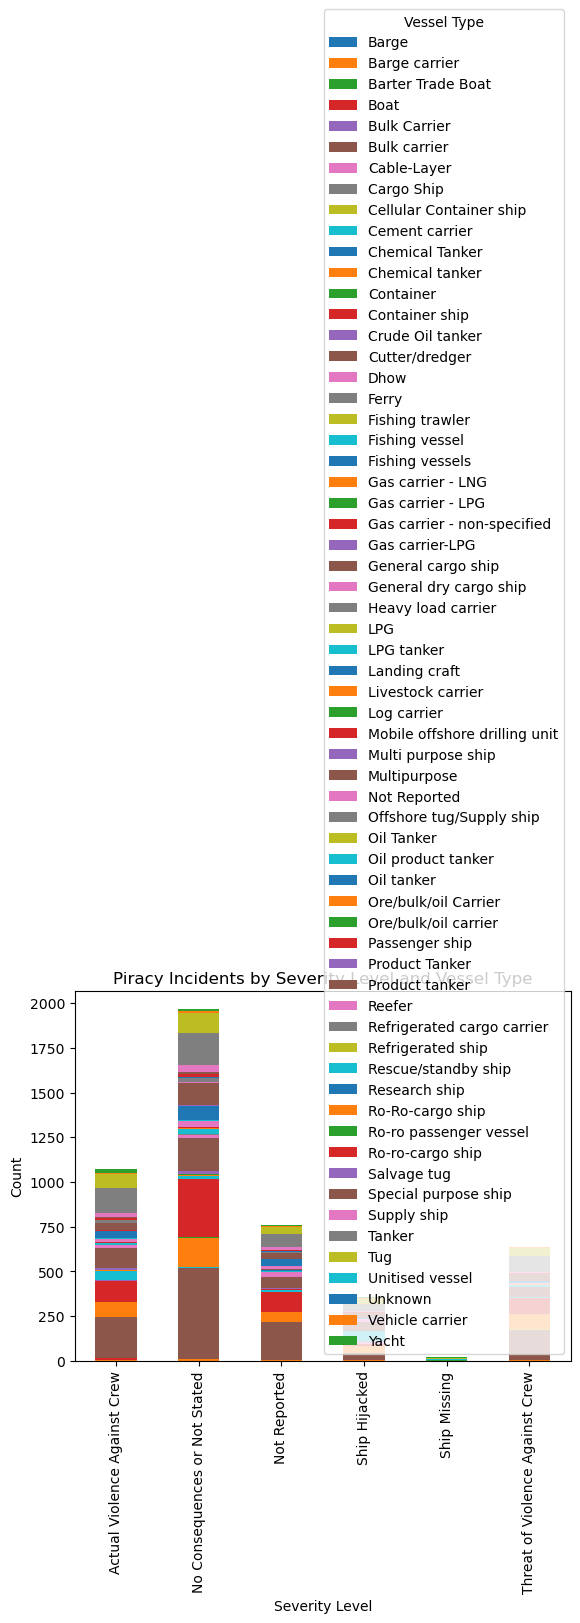

In [69]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming piracy_original_df is your DataFrame containing the piracy incidents data
# Group the data by severity level and vessel type, and count the occurrences
severity_vessel_counts = piracy_df_original.groupby(['Consequences to Crew', 'Ship Type']).size().unstack(fill_value=0)

# Plot the bar graph
severity_vessel_counts.plot(kind='bar', stacked=True)
plt.xlabel('Severity Level')
plt.ylabel('Count')
plt.title('Piracy Incidents by Severity Level and Vessel Type')
plt.legend(title='Vessel Type')
plt.show()

In [ ]:
piracy_df_original.